For this homework assignment, you are to submit a **single** ipynb file. Use the provided ipynb file to keep the same formatting for each question. In the ipynb file name, replace "NAME" with your first name. Unless otherwise specified, present your code as well as the output in your report. It is the student's responsibility to make sure the ipynb file runs when submitted. This assignment is worth 45 points.

#1: Uncertainty Estimates *(22 points)*

`creditcard.csv` contains several credit card transactions, classifying them as fraudulent (Class 1) or not (Class 0). The original data set had many features and PCA was used to reduce the dimensionality to 28 principal components. Therefore, these variables do not have much meaning. But we can still make a model with the variables.

In [ ]:
from google.colab import files
import pandas as pd
files.upload()
# You will need to replace "YOUR PATH" with the path to your csv file relative to where you ipynb file is saved
creditcard = pd.read_csv("creditcard.csv")

Saving creditcard.csv to creditcard.csv


In [ ]:
credinputs=creditcard.drop("Class",axis=1)
credoutputs=creditcard["Class"]


After splitting the data set into a 80% train, 20% test, build a random forest model with the number of estimators being 200 and the maximum number of leaf nodes being 15. *(5 points)*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
(X_traincred, X_testcred, Y_trainclass, Y_testclass)=train_test_split(credinputs,credoutputs,test_size=0.2)

forest_cred = RandomForestClassifier(n_estimators=200,max_leaf_nodes=15)
forest_cred.fit(X_traincred,Y_trainclass)


RandomForestClassifier(max_leaf_nodes=15, n_estimators=200)

For each transaction in the test set, show the probabilities of the transaction being fradulent or not. *(3 points)*

In [ ]:
forest_proba=forest_cred.predict_proba(X_testcred)
print(forest_proba)

[[9.99501197e-01 4.98803288e-04]
 [9.99519478e-01 4.80521588e-04]
 [9.99519478e-01 4.80521588e-04]
 ...
 [9.99519478e-01 4.80521588e-04]
 [9.99519478e-01 4.80521588e-04]
 [9.99510801e-01 4.89199453e-04]]


Using the output of the `predict_proba` function, write some code that determines the total number of transactions that would be determined as fraudulent. *(5 points)*

In [ ]:
credanswer=[]
trueth=0
fraudulent=0
for i in range(0,forest_proba.shape[0]):
  if forest_proba[i][0] > forest_proba[i][1]:
    credanswer==credanswer.append(0)
  else:
    credanswer==credanswer.append(1)
for i in range(0,len(credanswer)):
  if credanswer[i]==0:
    trueth=trueth+1
  else:
    fraudulent=fraudulent+1
print("The number of true transactions:",trueth)
print("The number of fraudulent transactions:", fraudulent)

The number of true transactions: 56900
The number of fraudulent transactions: 62


We could also retrict our model using the probabilities to say that we only want to make a prediction if the probabilitiy of a data point being in a certain class is above a certain threshold.

Write a boolean-valued function that determines if the predicted class would be above a threshold of 0.7. In other words, are you confident in your predicted class or not?

The function should input the array of class probabilities from a single transaction. *(5 points)*

In [ ]:
def boolprob(x):
  answer=[]
  if x[0]>0.7 or x[1]>0.7:
    answer="True"
  else:
    answer="False"
  return answer


Using your test set probabilities and your function you created above, find the count of how many times you were confident in your predictions. *(3 points)*

In [ ]:
conf=0
unconf=0
for i in range(0,forest_proba.shape[0]):
  if boolprob(forest_proba[i])=="True":
    conf=conf+1
  else:
    unconf=unconf+1
print("The number of confident predictions", conf)
print("The number of unconfident predictions", unconf)

The number of confident predictions 56933
The number of unconfident predictions 29


Was your model confident often? *(1 point)*

The model was confident very often. (56933/56962 = 99.94%)

#2: Dimensionality Reduction *(23 points)*

The `wine` dataset contains information about the chemical analysis of wines grown in the same region in Italy. It has features like alcohol content, malic acid, and color intensity. The targets represent three different types of wine cultivars/varieties.

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
Xw = wine.data
Yw = wine.target

In order to use a dimensionality reduction, we will first need to center the training and test sets. Load the `StandardScaler` function from the `preprocessing` package of `sklearn`.

Split the data into training and testing sets, apply the `StandardScaler().fit_transform` function to the training INPUT set and `StadardScaler().transform` function the test INPUT set. *(5 points)*

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

(X_trainxw, X_testxw, Y_trainyw, Y_testyw)=train_test_split(Xw,Yw)
scaler=StandardScaler()
X_trainxw_scale=scaler.fit_transform(X_trainxw)
X_testxw_scale=scaler.transform(X_testxw)

Using the scaled training and testing input sets, build a Kernelized Support Vector Machine with the RBF/Gaussian kernel. Find the simple accuracy of the model. *(4 points)*

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf",probability=True)
svm.fit(X_trainxw_scale,Y_trainyw)
Y_pred = svm.predict(X_testxw_scale)
svm.score(X_testxw_scale,Y_testyw)

1.0

Let's try this again and see if we can improve this accuracy using dimensionality reduction. Use a Primary Component Analysis with 3 components fitted to the entire `wine` input set.

To do this, we use the `PCA` function from the `decomposition` subpackage of `sklearn` that has an input variable `n_components` of which we will set to 3. *(5 points)*

In [ ]:
from sklearn.decomposition import PCA
pca_trial=PCA(n_components=3)
pca_trial.fit(Xw)

PCA(n_components=3)

Now take the scaled train and test set from above and transform them using your PCA transformer instead of `StandardScaler()`.

Develop a new `SVC` model with RBF kernel using the PCA transformed scaled input training set and original output set. Did the accuracy improve? *(5 points)*

In [ ]:
# CHECK
X_trainxw_pca=pca_trial.fit_transform(X_trainxw_scale)
X_testxw_pca=pca_trial.transform(X_testxw_scale)

svm_pca= SVC(kernel="rbf",probability=True)
svm_pca.fit(X_trainxw_pca,Y_trainyw)
Y_pred = svm_pca.predict(X_testxw_pca)
svm_pca.score(X_testxw_pca,Y_testyw)

0.9555555555555556

The accuracy declined.

We can also perform dimensionality reduction using a method called t-SNE (t-Distributed Stochastic Neighbor Embedding). The goal is to reduce the dimensions while preserving the structure and relationships between the original data points. *(2 points)*

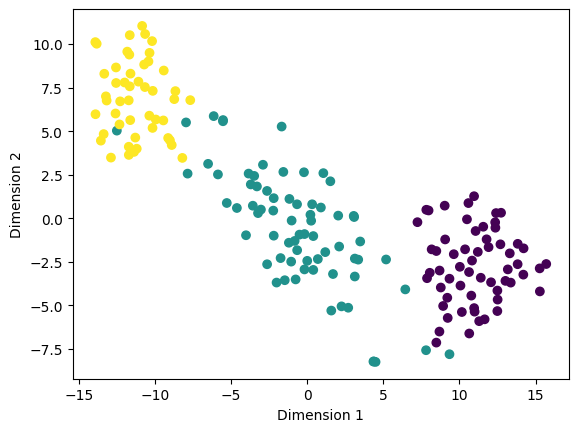

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2)
X_scaled = scaler.fit_transform(Xw)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Yw)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Can you observe the values of the different classes? How would you classify something that had new dimensional values as (2,-7)? Originally, this data set with 13 variables would have to be viewed in $\mathbb{R}^{13}$ and the classes would not be as separated. By doing dimensionality reduction, we can now view the data set AND see the separation of classes. *(2 points)*

I can observe that that values for each class are divided into three segments colored as either yellow (x<-7,Y>2.5), blue/green (-7<x<7, y<=5), and purple (X>5,Y<2.5) with thier values declining from the left towards the right corner. (2,-7) would seem to fit in with blue/green.